#**FINAL ASSIGNMENT**

*  Course code: 212IS2901
*  Group: BIGROSE
*  Members:
    1.   Lưu Nguyễn Huỳnh Lê (Leader) - K194111541
    2.   Hồ Kim Ngân - K194111548
    3.   Nguyễn Mai Phương Thảo - K194111570
    4.   Trần Thị Mỹ Thảo - K194111571
    5.   Hoàng Kim Yến - K194111594

##**Dataset description, Data Cleaning, EDA**

###**Import, Describe Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/Shareddrives/212IS2901_DAwP_Project/scanner_data.csv')
df

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...,...
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57


###**Data Cleaning**

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.isnull().sum()

Date              0
Customer_ID       0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
dtype: int64

In [5]:
df.describe(include = 'all')

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
count,131706,131706.000000,131706.000000,131706,131706,131706.000000,131706.000000
unique,363,NaN,NaN,187,5242,NaN,NaN
top,23/09/2016,NaN,NaN,N8U,UNJKW,NaN,NaN
freq,638,NaN,NaN,10913,2007,NaN,NaN
mean,NaN,12386.450367,32389.604187,NaN,NaN,1.485311,11.981524
std,NaN,6086.447552,18709.901238,NaN,NaN,3.872667,19.359699
min,NaN,1.000000,1.000000,NaN,NaN,0.010000,0.020000
25%,NaN,7349.000000,16134.000000,NaN,NaN,1.000000,4.230000
50%,NaN,13496.000000,32620.000000,NaN,NaN,1.000000,6.920000
75%,NaN,17306.000000,48548.000000,NaN,NaN,1.000000,12.330000


In [6]:
df = df[df['Quantity'] >= 1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131375 entries, 0 to 131705
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            131375 non-null  object 
 1   Customer_ID     131375 non-null  int64  
 2   Transaction_ID  131375 non-null  int64  
 3   SKU_Category    131375 non-null  object 
 4   SKU             131375 non-null  object 
 5   Quantity        131375 non-null  float64
 6   Sales_Amount    131375 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 8.0+ MB


In [7]:
def thresholds(df, var):
    q1 = df[var].quantile(0.05)
    q3 = df[var].quantile(0.95)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    return lower_limit, upper_limit

In [8]:
lower_limit_1, upper_limit_1 = thresholds(df, 'Quantity')
cond = (df['Quantity'] < upper_limit_1)&(df['Quantity'] > lower_limit_1)
df = df[cond]
lower_limit_1, upper_limit_1

(-2.0, 6.0)

In [9]:
lower_limit_2, upper_limit_2 = thresholds(df, 'Sales_Amount')
cond = (df['Sales_Amount'] < upper_limit_2)&(df['Sales_Amount'] > lower_limit_2)
df = df[cond]
lower_limit_2, upper_limit_2

(-49.865, 88.175)

In [10]:
df

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...
131701,04/07/2016,20203,32900,IEV,FO112,3.0,6.46
131702,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50
131703,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19
131704,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57


In [11]:
df.describe(include = 'all')

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
count,128946,128946.000000,128946.000000,128946,128946,128946.000000,128946.000000
unique,363,NaN,NaN,185,5069,NaN,NaN
top,23/09/2016,NaN,NaN,N8U,UNJKW,NaN,NaN
freq,625,NaN,NaN,10911,2007,NaN,NaN
mean,NaN,12379.541110,32379.801103,NaN,NaN,1.275560,10.379821
std,NaN,6087.731351,18717.852976,NaN,NaN,0.603554,10.856176
min,NaN,1.000000,1.000000,NaN,NaN,1.000000,0.020000
25%,NaN,7343.000000,16117.000000,NaN,NaN,1.000000,4.230000
50%,NaN,13483.000000,32605.500000,NaN,NaN,1.000000,6.810000
75%,NaN,17304.000000,48544.000000,NaN,NaN,1.000000,11.940000


###**EDA**

In [12]:
data = df.copy()
data.head(10)

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
5,02/01/2016,5010,6,JPI,GVBRC,1.0,10.77
6,02/01/2016,1666,7,XG4,AHAE7,1.0,3.65
7,02/01/2016,1666,7,FEW,AHZNS,1.0,8.21
8,02/01/2016,1253,8,0H2,9STQJ,1.0,8.25
9,02/01/2016,5541,9,N5F,7IE9S,1.0,8.18


In [13]:
#Checking duplicate entries
data.duplicated().sum()

0

In [14]:
pd.DataFrame([{'products': len(data['SKU'].value_counts()),    
               'transactions': len(data['Transaction_ID'].value_counts()),
               'customers': len(data['Customer_ID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,5069,63839,22464


In [15]:
#Changing the data type of the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date              datetime64[ns]
Customer_ID                int64
Transaction_ID             int64
SKU_Category              object
SKU                       object
Quantity                 float64
Sales_Amount             float64
dtype: object

In [16]:
#Checking the date range
data['Date'].nunique()

363

In [17]:
#Start and end dates
data['Date'].min(), data['Date'].max()
#The results show that this is the data of 1 year (from 2016-01-02 to 2016-12-31)

(Timestamp('2016-01-02 00:00:00'), Timestamp('2016-12-31 00:00:00'))

In [18]:
#Checking the missing dates
pd.date_range(start = '2016-01-02', end = '2016-12-31').difference(data['Date'])
#Those missing dates are '2016-03-27' & '2016-12-25'

DatetimeIndex(['2016-03-27', '2016-12-25'], dtype='datetime64[ns]', freq=None)

#### Sales by Quarter, Month, Week, Day ####

In [19]:
#Creating Quarter, Month, Week and Day of Week columns
sales_time = data.sort_values(by=['Date']).copy()
sales_time['Quarter'] = data.Date.dt.quarter
sales_time['Month'] = data.Date.dt.month
sales_time['Week'] = data.Date.dt.isocalendar().week
sales_time['Day of Week'] = data.Date.dt.dayofweek
sales_time.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Quarter,Month,Week,Day of Week
10108,2016-01-02,4124,4889,A38,W1ZMG,4.0,15.43,1,1,53,5
10260,2016-01-02,8746,4957,R6E,4R4F9,1.0,6.75,1,1,53,5
10259,2016-01-02,3403,4956,PZW,VW5YU,2.0,18.27,1,1,53,5
10258,2016-01-02,9584,4955,1EO,P8FMZ,1.0,52.45,1,1,53,5
10257,2016-01-02,9584,4955,1VL,LEYMS,2.0,21.98,1,1,53,5


In [20]:
#Set data for Sales Amount tables
sales_by_quarter = sales_time.groupby(['Quarter']).agg({'Sales_Amount':'sum'}).reset_index()
sales_by_month = sales_time.groupby(['Month']).agg({'Sales_Amount':'sum'}).reset_index()
sales_by_week = sales_time.groupby(['Week']).agg({'Sales_Amount':'sum'}).reset_index()
sales_by_weekofday = sales_time.groupby(['Day of Week']).agg({'Sales_Amount':'sum'}).reset_index()

In [21]:
#Sales by Quarter, Month, Week, Day of Week
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows = 2,cols = 2, subplot_titles = ('Sales by Quarter', 'Sales by Month', 'Sales by Week', 'Sales by Day of Week'))
fig.add_trace(go.Bar(x = sales_by_quarter['Quarter'], y = sales_by_quarter['Sales_Amount']), row = 1, col = 1)
fig.add_trace(go.Bar(x = sales_by_month['Month'], y = sales_by_month['Sales_Amount']), row = 1, col = 2)
fig.add_trace(go.Bar(x = sales_by_week['Week'], y = sales_by_week['Sales_Amount']), row = 2, col = 1)
fig.add_trace(go.Bar(x = sales_by_weekofday['Day of Week'], y = sales_by_weekofday['Sales_Amount']), row = 2, col = 2)
fig.update_layout(showlegend = False, title_text="Sales Amounts Over different Periods")

#### SKU ####

In [22]:
#Total products (Total SKU)
total_sku = data['SKU'].nunique()
total_sku
#There are a total of 5069 products

5069

In [23]:
#Total product categories (SKU_Category)
total_sku_cat = data['SKU_Category'].nunique()
total_sku_cat
#There are a total of 187 product categories

185

In [24]:
#Top 10 best selling items
sku = data.groupby(['SKU']).agg({'Sales_Amount':'sum', 'Quantity':'sum'}).reset_index()
sku.sort_values(['Quantity'], ascending = False).head(10)

,SKU,Sales_Amount,Quantity
4359,UNJKW,4526.28,2179.0
1746,C6TXL,4621.50,1027.0
4542,W1ZMG,3928.49,1018.0
394,2SVKS,2215.25,1002.0
4056,SJ0ZD,1156.70,945.0
1451,A59HR,2258.08,912.0
639,4FT32,1773.29,910.0
1995,DWJC4,10592.09,823.0
3670,PWG2Z,4098.42,819.0
583,3YDVF,25733.70,810.0


#### Transactions

In [25]:
#Total transactions
transactions = sales_time.sort_values('Transaction_ID')
data.Transaction_ID.nunique()

63839

In [26]:
#Set data for Transaction_ID tables
transactions_by_quarter = sales_time.groupby(['Quarter']).agg({'Transaction_ID':'nunique'}).reset_index()
transactions_by_month = sales_time.groupby(['Month']).agg({'Transaction_ID':'nunique'}).reset_index()
transactions_by_week = sales_time.groupby(['Week']).agg({'Transaction_ID':'nunique'}).reset_index()
transactions_by_weekofday = sales_time.groupby(['Day of Week']).agg({'Transaction_ID':'nunique'}).reset_index()

In [27]:
#Total Transactions Over different Periods
fig2 = make_subplots(rows = 2,cols = 2, subplot_titles=('Transactions by Quarter', 'Transactions by Month', 'Transactions By Week', 'Transactions By Day of Week'))
fig2.add_trace(go.Bar(x = transactions_by_quarter['Quarter'], y = transactions_by_quarter['Transaction_ID']), row = 1, col = 1)
fig2.add_trace(go.Bar(x = transactions_by_month['Month'], y = transactions_by_month['Transaction_ID']), row = 1, col = 2)
fig2.add_trace(go.Bar(x = transactions_by_week['Week'], y = transactions_by_week['Transaction_ID']), row = 2, col = 1)
fig2.add_trace(go.Bar(x = transactions_by_weekofday['Day of Week'], y = transactions_by_weekofday['Transaction_ID']), row = 2, col = 2)
fig2.update_layout(showlegend=False, title_text="Total Transactions Over different Periods")

In [28]:
fig = make_subplots(rows = 2, cols = 2, subplot_titles = ('Quarterly', 'Monthly', 'Weekly', 'Day of Week'),
                                specs=[[{"secondary_y": True}, {"secondary_y": True}],
                                       [{"secondary_y": True}, {"secondary_y": True}]])

#Quarterly
fig.add_trace(go.Bar(x = sales_by_quarter['Quarter'], y = sales_by_quarter['Sales_Amount'], name = 'Sale Amount'), row = 1, col = 1, secondary_y = False)
fig.add_trace(go.Line(x = transactions_by_quarter['Quarter'], y = transactions_by_quarter['Transaction_ID'], name = 'Total Transaction'), row = 1, col = 1, secondary_y = True)
#Monthly
fig.add_trace(go.Bar(x = sales_by_month['Month'], y = sales_by_month['Sales_Amount'], name = 'Sale Amount'), row = 1, col = 2,secondary_y = False)
fig.add_trace(go.Line(x = transactions_by_month['Month'], y = transactions_by_month['Transaction_ID'], name = 'Total Transaction'), row = 1, col = 2,secondary_y = True)
#Weekly
fig.add_trace(go.Bar(x = sales_by_week['Week'], y = sales_by_week['Sales_Amount'], name = 'Sale Amount'), row = 2, col = 1,secondary_y = False)
fig.add_trace(go.Line(x = transactions_by_week['Week'], y = transactions_by_week['Transaction_ID'], name = 'Total Transaction'), row = 2, col = 1,secondary_y = True)
#By Day of Week
fig.add_trace(go.Bar(x = sales_by_weekofday['Day of Week'], y = sales_by_weekofday['Sales_Amount'], name = 'Sale Amount'), row = 2, col = 2,secondary_y = False)
fig.add_trace(go.Line(x = transactions_by_weekofday['Day of Week'], y = transactions_by_weekofday['Transaction_ID'], name = 'Total Transaction'), row = 2, col = 2,secondary_y = True)

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




##**RFM Analysis**

###**Recency**

In [29]:
#Convert 'Date' data type to Datetime (Chuyển kiểu dl của 'Date' sang Datetime)
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
#Get a maximum Date from Dataset (Tìm Date lớn nhất trong dataset)
df['Date'].max()

Timestamp('2016-12-31 00:00:00')

In [31]:
#Chose 01/01/2027 as the analysis date since 31/12/2016 is the maximum date (Do 31/12/2016 là ngày lớn nhất trong dataset nên chọn 1/1/2017 làm mốc để tính recency)
import datetime as dt
Latest_Date = dt.date(2017,1,1)
Latest_Date

datetime.date(2017, 1, 1)

In [32]:
#Select the most recent purchase date by Customer ID (Chọn ngày mua hàng gần đây nhất theo từng Customer ID)
recency_df = df.groupby(by = 'Customer_ID')['Date'].max().reset_index()

#Convert 'Date' data type to Datetime (Chuyển giá trị Date thành date)
recency_df['Date'] = pd.DatetimeIndex(recency_df['Date']).date

#Create a 'Recency' column with Latest Date subtract the last date that Customer ID made a purchase (Tạo cột recency bằng Lastest Date - Ngày gần nhất CustomerID đó mua hàng)
recency_df['Recency'] = recency_df['Date'].apply(lambda x : (Latest_Date - x).days)

recency_df.drop(columns=['Date'],inplace=True)
recency_df

,Customer_ID,Recency
0,1,345
1,2,196
2,3,335
3,4,55
4,5,121
...,...,...
22459,22621,81
22460,22622,16
22461,22623,11
22462,22624,324


###**Frequency**

In [33]:
frequency_df = df.copy()
#Drop rows with the same CustomerID and Transaction_ID, keep the first column (Bỏ những dòng có cùng CustomerID và Transaction_ID, giữ lại cột đầu tiên)
frequency_df.drop_duplicates(subset=['Customer_ID','Transaction_ID'], keep="first", inplace=True)
frequency_df

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,2016-02-01,2547,1,X52,0EM7L,1.0,3.13
1,2016-02-01,822,2,2ML,68BRQ,1.0,5.46
2,2016-02-01,3686,3,0H2,CZUZX,1.0,6.35
3,2016-02-01,3719,4,0H2,549KK,1.0,5.59
4,2016-02-01,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...
131692,2016-04-07,10501,32896,ILF,5TPXK,1.0,2.15
131693,2016-04-07,10764,32897,X52,F9JVE,1.0,3.74
131695,2016-04-07,11733,32898,N8U,X5TFY,1.0,4.57
131696,2016-04-07,10468,32899,1VL,USW0M,1.0,5.87


In [34]:
frequency_df = frequency_df.groupby(by = 'Customer_ID')['Transaction_ID'].count().reset_index()
frequency_df.columns = ['Customer_ID','Frequency']
frequency_df

,Customer_ID,Frequency
0,1,1
1,2,2
2,3,1
3,4,2
4,5,5
...,...,...
22459,22621,1
22460,22622,1
22461,22623,1
22462,22624,1


###**Monetary**

In [35]:
monetary_df = df.groupby(by = 'Customer_ID')['Sales_Amount'].sum().reset_index()
monetary_df.columns = ['Customer_ID', 'Monetary']
monetary_df

,Customer_ID,Monetary
0,1,16.29
1,2,22.77
2,3,10.92
3,4,33.29
4,5,78.82
...,...,...
22459,22621,9.69
22460,22622,6.07
22461,22623,30.15
22462,22624,19.60


###**RFM DataFrame**

In [36]:
rfm_df = recency_df.merge(frequency_df.merge(monetary_df))
rfm_df.set_index('Customer_ID', inplace = True)

In [37]:
rfm_df

,Recency,Frequency,Monetary
Customer_ID,,,
1,345,1,16.29
2,196,2,22.77
3,335,1,10.92
4,55,2,33.29
5,121,5,78.82
...,...,...,...
22621,81,1,9.69
22622,16,1,6.07
22623,11,1,30.15


In [38]:
rfm_df.describe(include = 'all')

,Recency,Frequency,Monetary
count,22464.000000,22464.000000,22464.000000
mean,145.657719,2.841836,59.581390
std,109.276128,3.962918,117.016958
min,1.000000,1.000000,0.140000
25%,45.000000,1.000000,10.020000
50%,121.000000,1.000000,23.200000
75%,243.000000,3.000000,58.920000
max,365.000000,99.000000,3118.150000


####**Check**

In [39]:
test_df = rfm_df.reset_index()
test_df[test_df['Customer_ID'] == 2826]

,Customer_ID,Recency,Frequency,Monetary
2802,2826,31,4,41.07


In [40]:
test_df_2 = df[df['Customer_ID'] == 2826]
test_df_2

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
169,2016-02-01,2826,98,0H2,ABFD7,1.0,4.84
170,2016-02-01,2826,98,0H2,O1X0L,1.0,6.07
175,2016-02-01,2826,103,0H2,O1X0L,1.0,6.07
195,2016-02-01,2826,109,H15,E3PAN,1.0,8.32
196,2016-02-01,2826,109,DMA,ODYUV,1.0,12.50
3235,2016-12-01,2826,1587,2ML,XH98I,1.0,3.27


In [41]:
max_date = dt.date(2016,12,1)
recency = (Latest_Date - max_date).days
monetary = test_df_2['Sales_Amount'].sum()
frequency = test_df_2.drop_duplicates(subset=['Customer_ID','Transaction_ID'], keep="first").shape[0]

print(f'Recency: {recency}')
print(f'Frequency: {frequency}')
print(f'Monetary: {monetary}')

Recency: 31
Frequency: 4
Monetary: 41.07


###**Segments**

In [42]:
quantiles = rfm_df.quantile(q=[0.2,0.4,0.6,0.8])
quantiles

,Recency,Frequency,Monetary
0.2,33.0,1.0,8.272
0.4,89.0,1.0,16.462
0.6,169.0,2.0,32.738
0.8,263.0,4.0,74.686


In [43]:
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 2.0, 0.8: 4.0},
 'Monetary': {0.2: 8.272000000000007,
  0.4: 16.462000000000007,
  0.6: 32.73799999999999,
  0.8: 74.68600000000005},
 'Recency': {0.2: 33.0, 0.4: 89.0, 0.6: 169.0, 0.8: 263.0}}

In [44]:
segmentation_df = rfm_df.copy()

####**RScore, FScore, MScore**

In [45]:
def RScore(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5

In [46]:
segmentation_df['R_Score'] = segmentation_df['Recency'].apply(RScore, args=('Recency',quantiles,))
segmentation_df['F_Score'] = segmentation_df['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
segmentation_df['M_Score'] = segmentation_df['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
segmentation_df

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
Customer_ID,,,,,,
1,345,1,16.29,1,1,2
2,196,2,22.77,2,3,3
3,335,1,10.92,1,1,2
4,55,2,33.29,4,3,4
5,121,5,78.82,3,5,5
...,...,...,...,...,...,...
22621,81,1,9.69,4,1,2
22622,16,1,6.07,5,1,1
22623,11,1,30.15,5,1,3


In [47]:
segmentation_df['RFM_Segment'] = segmentation_df['R_Score'].map(str) + segmentation_df['F_Score'].map(str) + segmentation_df['M_Score'].map(str)
segmentation_df['RFM_Score'] = segmentation_df[['R_Score', 'F_Score', 'M_Score']].sum(axis = 1)
segmentation_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
Customer_ID,,,,,,,,
1,345,1,16.29,1,1,2,112,4
2,196,2,22.77,2,3,3,233,8
3,335,1,10.92,1,1,2,112,4
4,55,2,33.29,4,3,4,434,11
5,121,5,78.82,3,5,5,355,13


####**RFM Level**

In [48]:
rfmscore_cuts = pd.qcut(segmentation_df['RFM_Score'], q = 4, labels = ['Bronze', 'Silver', 'Gold', 'Platinum'])
segmentation_df['RFM_Level'] = rfmscore_cuts.values
segmentation_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Level
Customer_ID,,,,,,,,,
1,345,1,16.29,1,1,2,112,4,Bronze
2,196,2,22.77,2,3,3,233,8,Silver
3,335,1,10.92,1,1,2,112,4,Bronze
4,55,2,33.29,4,3,4,434,11,Gold
5,121,5,78.82,3,5,5,355,13,Platinum


In [49]:
segmentation_df.groupby(by = 'RFM_Level')['RFM_Level'].count()

RFM_Level
Bronze      5897
Silver      6436
Gold        4626
Platinum    5505
Name: RFM_Level, dtype: int64

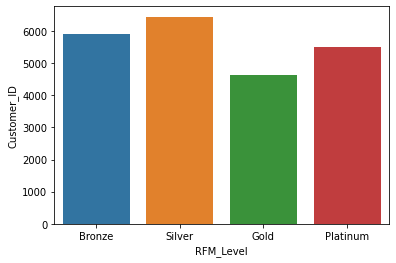

In [50]:
seg1=segmentation_df.reset_index().groupby('RFM_Level')['Customer_ID'].nunique().sort_values(ascending=False).reset_index()
ax1 = sns.barplot(data=seg1, x='RFM_Level', y='Customer_ID')

In [51]:
segmentation_df[['RFM_Level', 'Recency','Frequency','Monetary']].groupby('RFM_Level').agg('mean')

,Recency,Frequency,Monetary
RFM_Level,,,
Bronze,256.367475,1.006105,9.253807
Silver,149.828310,1.251243,22.568585
Gold,117.313446,2.350411,47.106025
Platinum,46.007084,7.080836,167.248460


In [52]:
segmentation_df.groupby('RFM_Score')['Monetary'].max()
top10_cus = segmentation_df[segmentation_df['RFM_Segment'] == '555'].sort_values(by = 'Monetary', ascending = False).head(10)
top10_cus

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Level
Customer_ID,,,,,,,,,
17104,1,55,3118.15,5,5,5,555,15,Platinum
17294,16,37,2716.09,5,5,5,555,15,Platinum
15540,15,38,2152.95,5,5,5,555,15,Platinum
17471,17,48,2028.65,5,5,5,555,15,Platinum
1665,3,96,1750.06,5,5,5,555,15,Platinum
17309,10,33,1695.38,5,5,5,555,15,Platinum
16905,11,40,1630.19,5,5,5,555,15,Platinum
17061,1,41,1574.19,5,5,5,555,15,Platinum
17732,9,41,1533.84,5,5,5,555,15,Platinum


In [53]:
top10_cus.describe(include=[np.number])

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
count,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0
mean,9.400000,48.900000,1970.297000,5.0,5.0,5.0,15.0
std,5.966574,18.549933,549.304639,0.0,0.0,0.0,0.0
min,1.000000,33.000000,1503.470000,5.0,5.0,5.0,15.0
25%,4.500000,38.500000,1588.190000,5.0,5.0,5.0,15.0
50%,10.500000,41.000000,1722.720000,5.0,5.0,5.0,15.0
75%,14.000000,53.250000,2121.875000,5.0,5.0,5.0,15.0
max,17.000000,96.000000,3118.150000,5.0,5.0,5.0,15.0


####**Label Segmentation**

In [54]:
#Segmentation
seg_map = {
 r'11': 'Lost',
 r'2[1-2]': 'Hibernating',
 r'[1–2][3–4]': 'At Risk',
 r'[1-2]5': 'Can\'t Lose',
 r'3[1–2]': 'About to Sleep',
 r'33': 'Need Attention',
 r'41': 'Promising',
 r'51': 'Recent Customers',
 r'[4–5][2–3]': 'Potential Loyalists',
 r'[3–4][4–5]': 'Loyal Customers',
 r'5[4–5]': 'Champions'}
segmentation_df['Segment'] = segmentation_df['R_Score'].map(str) + segmentation_df['F_Score'].map(str)
segmentation_df['Segment'] = segmentation_df['Segment'].replace(seg_map, regex=True)
segmentation_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Level,Segment
Customer_ID,,,,,,,,,,
1,345,1,16.29,1,1,2,112,4,Bronze,Lost
2,196,2,22.77,2,3,3,233,8,Silver,At Risk
3,335,1,10.92,1,1,2,112,4,Bronze,Lost
4,55,2,33.29,4,3,4,434,11,Gold,Potential Loyalists
5,121,5,78.82,3,5,5,355,13,Platinum,Loyal Customers


In [55]:
df_treemap = segmentation_df.reset_index().groupby('Segment').agg(
    Count=('Customer_ID', 'count')
).reset_index()
df_treemap

,Segment,Count
0,About to Sleep,2271
1,At Risk,2362
2,Can't Lose,209
3,Champions,2786
4,Hibernating,2860
5,Lost,3547
6,Loyal Customers,3033
7,Need Attention,982
8,Potential Loyalists,1611
9,Promising,1713


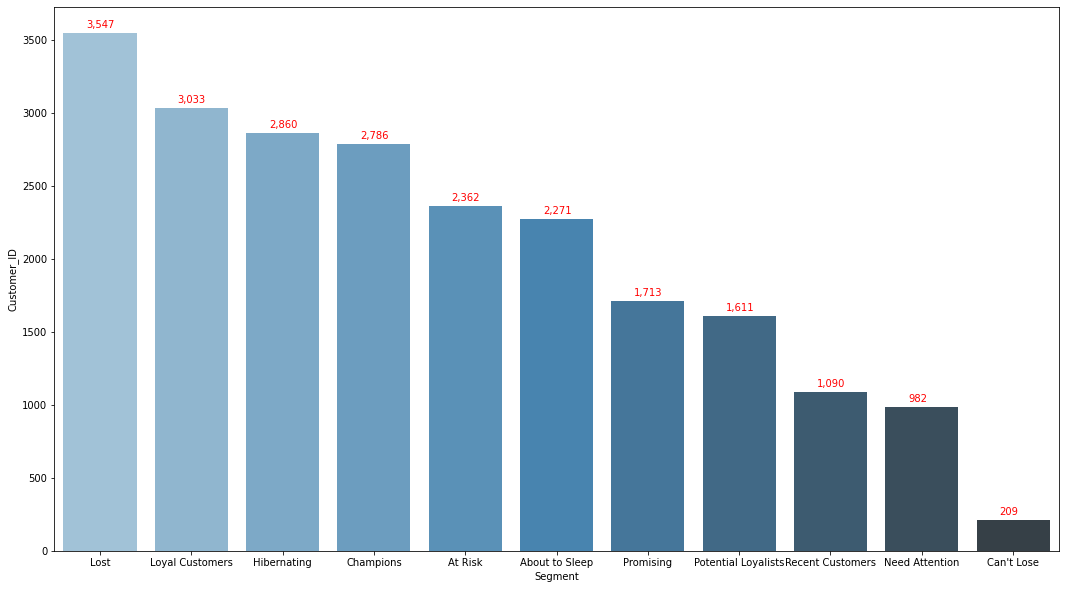

In [56]:
seg2=segmentation_df.reset_index().groupby('Segment')['Customer_ID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(18,10))
ax2 = sns.barplot(data=seg2, x='Segment', y='Customer_ID',palette='Blues_d')
for index, value in enumerate(seg2['Customer_ID']):
    ax2.text(index - .15, value + 35, "{:,.0f}".format(value), color='red');

In [57]:
segmentation_df[['Segment', 'Recency','Frequency','Monetary']].groupby('Segment').agg('mean')

,Recency,Frequency,Monetary
Segment,,,
About to Sleep,125.466755,1.000000,17.756226
At Risk,246.935648,2.431414,47.583755
Can't Lose,229.430622,5.976077,142.637321
Champions,16.229002,8.749103,201.806892
Hibernating,218.986014,1.000000,16.952437
Lost,314.637440,1.000000,17.699710
Loyal Customers,83.419057,5.211012,110.894200
Need Attention,125.136456,2.000000,37.498921
Potential Loyalists,42.536313,2.000000,36.723451


In [58]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


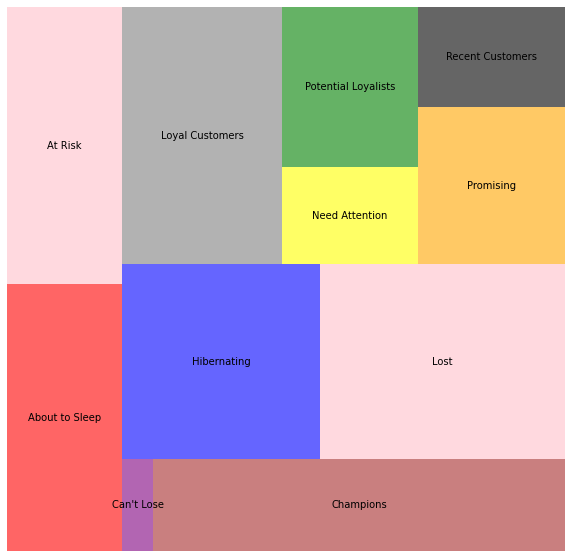

In [59]:
import squarify
fig, ax = plt.subplots(1, figsize = (10,10))

squarify.plot(sizes=df_treemap['Count'], 
              label=df_treemap['Segment'], 
              alpha=.6,
              color = ['red', 'pink', 'purple', 'brown', 'blue', 'pink', 'gray', 'yellow', 'green', 'orange', 'black']
             )
plt.axis('off')
plt.show()

##**Kmeans Clustering**

###**Determining The Optimal Number Of Clusters**

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster

In [61]:
rfm_df

,Recency,Frequency,Monetary
Customer_ID,,,
1,345,1,16.29
2,196,2,22.77
3,335,1,10.92
4,55,2,33.29
5,121,5,78.82
...,...,...,...
22621,81,1,9.69
22622,16,1,6.07
22623,11,1,30.15


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



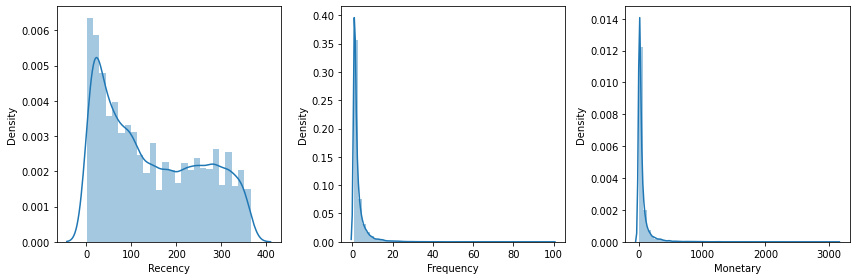

In [62]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
sns.distplot(rfm_df['Recency'], ax = ax[0])
sns.distplot(rfm_df['Frequency'], ax = ax[1])
sns.distplot(rfm_df['Monetary'], ax = ax[2])

plt.tight_layout()
plt.show()

In [63]:
#Z-Score
from scipy.stats import zscore
rfm_zscore = rfm_df.apply(zscore)
rfm_zscore

,Recency,Frequency,Monetary
Customer_ID,,,
1,1.824248,-0.464778,-0.369966
2,0.460699,-0.212433,-0.314589
3,1.732734,-0.464778,-0.415858
4,-0.829639,-0.212433,-0.224685
5,-0.225651,0.544602,0.164412
...,...,...,...
22621,-0.591704,-0.464778,-0.426370
22622,-1.186541,-0.464778,-0.457306
22623,-1.232298,-0.464778,-0.251519


Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

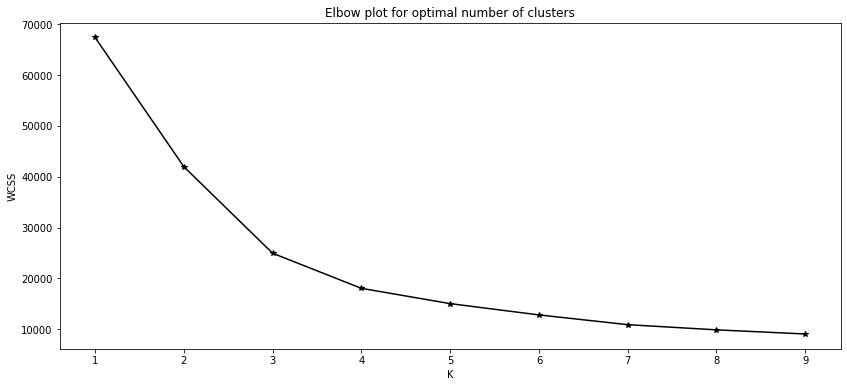

In [64]:
#Elbow Method for optimal value of k in KMeans
from scipy.spatial.distance import cdist

wcss = []
#Within Cluster Sum Of Squares (WCSS)
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i, random_state = 20)
  kmeans.fit(rfm_zscore)
  wcss.append(kmeans.inertia_)

plt.figure(figsize = (14,6))
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(range(1,10), wcss, marker="*", c="black")
plt.title("Elbow plot for optimal number of clusters")

> **Based on the elbow graph, it is found the number of clusters optimal according to the Elbow method is 4 clusters.**

In [65]:
#Silhouette analysis
from sklearn.metrics import silhouette_score

for num_clusters in range(2,10):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, random_state=20)
    kmeans.fit(rfm_zscore)
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(rfm_zscore, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1:.4f}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6657
For n_clusters=3, the silhouette score is 0.4985
For n_clusters=4, the silhouette score is 0.5133
For n_clusters=5, the silhouette score is 0.4936
For n_clusters=6, the silhouette score is 0.4181
For n_clusters=7, the silhouette score is 0.4192
For n_clusters=8, the silhouette score is 0.4089
For n_clusters=9, the silhouette score is 0.3646


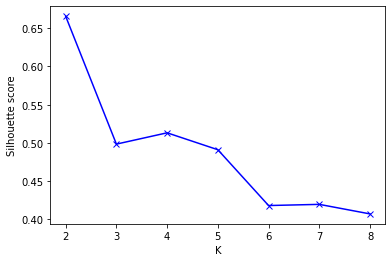

In [66]:
range_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for i in range_clusters:

 kmeans = KMeans(n_clusters=i)
 kmeans.fit(rfm_zscore)
 cluster_labels = kmeans.labels_

 silhouette_avg.append(silhouette_score(rfm_zscore, cluster_labels))
plt.plot(range_clusters,silhouette_avg, 'bx-')
plt.xlabel('K') 
plt.ylabel('Silhouette score') 
plt.show()

> At K = 4, the average score is around 0.5133 and is also the highest score of all clusters between 3 and 9. At the point K = 2 there is a Silhouette score higher than K = 5, but because K = 2 is not suitable for the data set and when performing analysis, the model will not give high clustering efficiency if the k value is too low. **So K=4 is the most appropriate value of K.**

In [67]:
kmean_model = KMeans(n_clusters=4, init='k-means++', max_iter=1000, random_state=20)
kmean_model.fit(rfm_zscore)

rfm_zscore['Cluster'] = kmean_model.labels_

rfm_zscore.head()

,Recency,Frequency,Monetary,Cluster
Customer_ID,,,,
1,1.824248,-0.464778,-0.369966,0
2,0.460699,-0.212433,-0.314589,0
3,1.732734,-0.464778,-0.415858,0
4,-0.829639,-0.212433,-0.224685,3
5,-0.225651,0.544602,0.164412,3


In [68]:
import plotly.express as px
plotly_fig = px.scatter_3d(rfm_zscore, x = 'Frequency', y = 'Recency', z = 'Monetary', color = 'Cluster')
plotly_fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



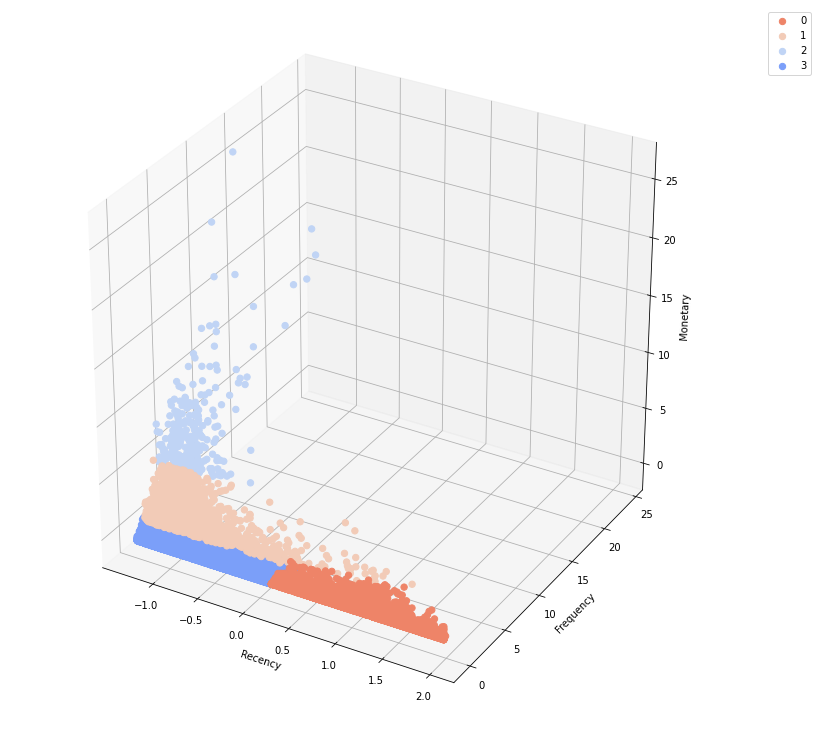

In [69]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
fig.add_axes(ax)

# Find all the unique labels in the 'name' column
labels = np.unique(rfm_zscore['Cluster'])
# Get palette from seaborn
palette = sns.color_palette("coolwarm_r", len(labels))

# Plot
for label, color in zip(labels, palette):
    df1 = rfm_zscore[rfm_zscore['Cluster'] == label]
    ax.scatter(df1['Recency'], df1['Frequency'], df1['Monetary'],
               s=40, marker='o', color=color, alpha=1, label=label)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [70]:
centroids = kmean_model.cluster_centers_
centroids

array([[ 1.08244972, -0.354744  , -0.28806928],
       [-0.93786771,  1.72726021,  1.51638312],
       [-1.18301577,  5.63274009,  6.42456231],
       [-0.67292262, -0.14716135, -0.18161266]])

In [71]:
rfm_zscore.groupby(by = 'Cluster')['Cluster'].count()

Cluster
0     8984
1     1961
2      257
3    11262
Name: Cluster, dtype: int64

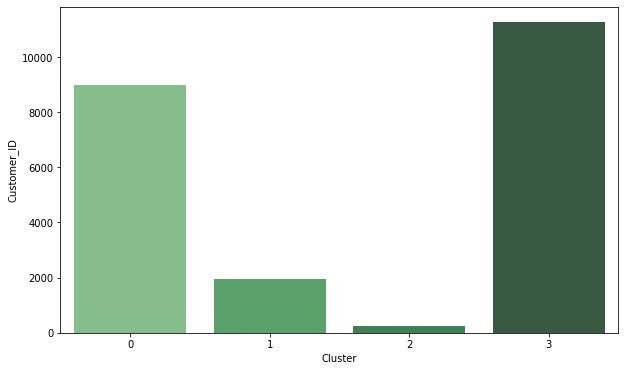

In [72]:
seg3=rfm_zscore.reset_index().groupby('Cluster')['Customer_ID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
ax3 = sns.barplot(data=seg3, x='Cluster', y='Customer_ID',palette='Greens_d');

> **In general, the density of data points under each cluster is quite reasonable. The cluster with the most data points is cluster 3 and the lowest is cluster 2.**

###**Overview about clusters**

In [73]:
rfm_df['Cluster'] = kmean_model.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Cluster
Customer_ID,,,,
1,345,1,16.29,0
2,196,2,22.77,0
3,335,1,10.92,0
4,55,2,33.29,3
5,121,5,78.82,3


In [74]:
rfm_df_eda = pd.DataFrame({'Total Revenue': rfm_df.groupby (by = 'Cluster')['Monetary'].sum(),
                          'Total Number of Customer': rfm_df.groupby (by = 'Cluster')['Monetary'].count(),
                          'Revenue Ratio':(rfm_df.groupby (by = 'Cluster')['Monetary'].sum()/rfm_df['Monetary'].sum())*100,
                          'Percentage of Customers':(rfm_df.groupby (by = 'Cluster')['Monetary'].count()/rfm_df['Monetary'].count())*100,}).reset_index()
rfm_df_eda

,Cluster,Total Revenue,Total Number of Customer,Revenue Ratio,Percentage of Customers
0,0,232427.90,8984,17.365630,39.992877
1,1,465068.72,1961,34.747167,8.729523
2,2,208516.28,257,15.579096,1.144053
3,3,432423.45,11262,32.308107,50.133547


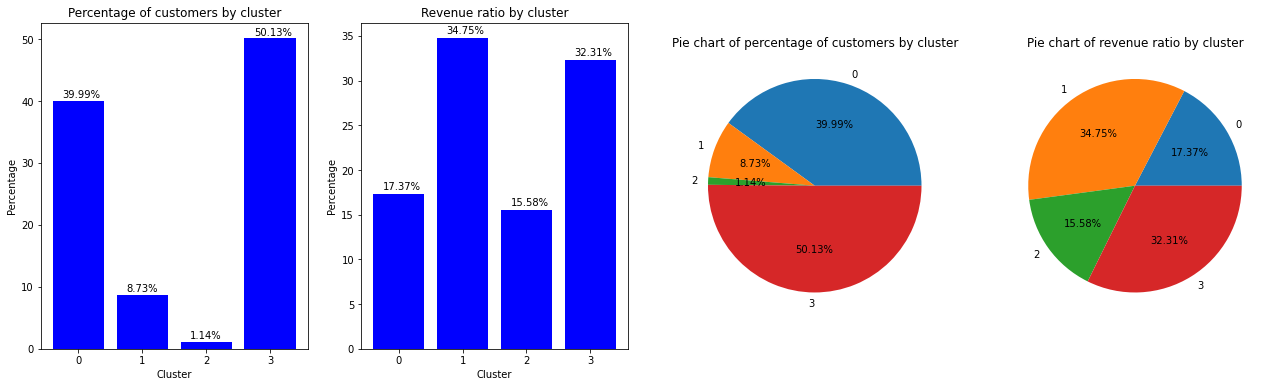

In [75]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, nrows = 1, figsize = (22,6))

ax1.bar(rfm_df_eda['Cluster'], rfm_df_eda['Percentage of Customers'], color = 'b')
ax1.set(title ='Percentage of customers by cluster', xlabel ='Cluster', ylabel='Percentage')
for index, value in enumerate(rfm_df_eda['Percentage of Customers']):
    ax1.text(index - 0.25, value+0.5,
             "{:,.2f}%".format(value))
    
ax2.bar(rfm_df_eda['Cluster'], rfm_df_eda['Revenue Ratio'], color = 'b')
ax2.set(title ='Revenue ratio by cluster', xlabel ='Cluster', ylabel='Percentage')
for index, value in enumerate(rfm_df_eda['Revenue Ratio']):
    ax2.text(index - 0.25, value +0.5,
             "{:,.2f}%".format(value))
    
ax3.pie(rfm_df_eda['Percentage of Customers'], labels = rfm_df_eda['Cluster'], autopct='%1.2f%%')
ax3.set(title = 'Pie chart of percentage of customers by cluster')
ax4.pie(rfm_df_eda['Revenue Ratio'], labels = rfm_df_eda['Cluster'], autopct='%1.2f%%')
ax4.set(title = 'Pie chart of revenue ratio by cluster')

plt.show()

* Cluster 0 has a high percentage of customers with 39.99% but only about 17.37% in total revenue.

* Cluster 1 is only about 8.73% on total customers but brings the highest revenue with 34.75% on total revenue.

* Cluster 2 has the lowest customer rate with 1.14% and is much lower than other clusters, but the revenue rate is not much different from cluster 0, accounting for 39.99% of the customer rate.

* Cluster 3 has the highest percentage of customers with 50.13% and brings 32.31% to the total revenue of the enterprise.

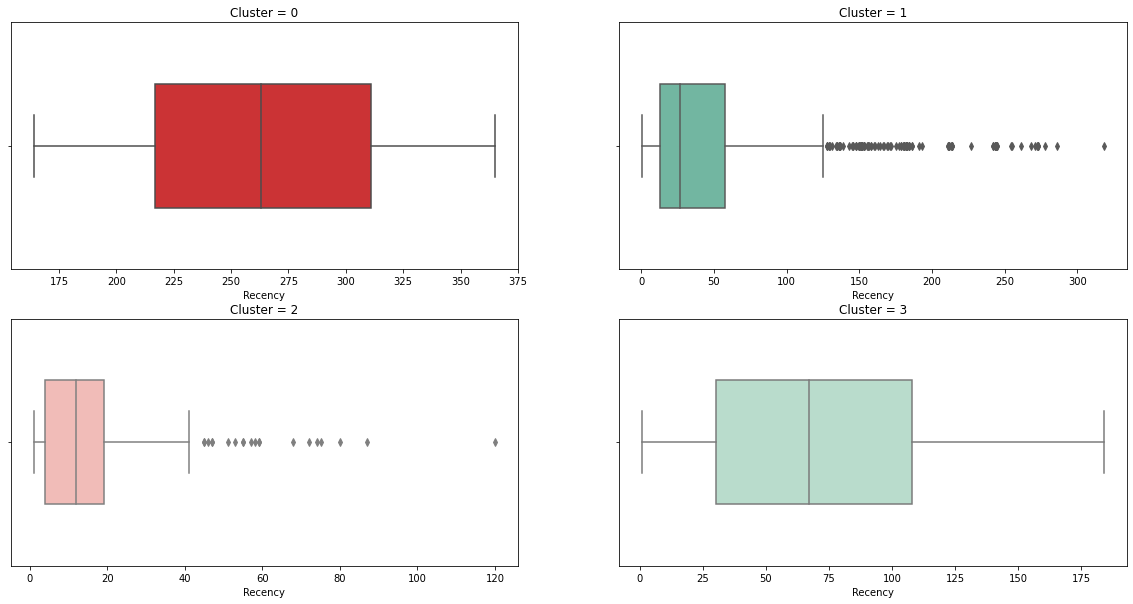

In [76]:
#Boxplots on Recency by Cluster
fig, ((ax1, ax2) , (ax3, ax4)) = plt.subplots(ncols = 2 ,nrows = 2,figsize = (20,10))
sns.boxplot(x=rfm_df[rfm_df['Cluster']==0]["Recency"], ax = ax1, palette="Set1", width=0.5).set_title("Cluster = 0")
sns.boxplot(x=rfm_df[rfm_df['Cluster']==1]["Recency"], ax = ax2, palette="Set2", width=0.5).set_title("Cluster = 1")
sns.boxplot(x=rfm_df[rfm_df['Cluster']==2]["Recency"], ax = ax3, palette="Pastel1", width=0.5).set_title("Cluster = 2")
sns.boxplot(x=rfm_df[rfm_df['Cluster']==3]["Recency"], ax = ax4, palette="Pastel2", width=0.5).set_title("Cluster = 3");

* Cluster 0 has a highest recency rate, which means it is been the longest for any cluster when it comes to Last Purchase Date
* Cluster 1 and 2 have a low recency rate, which is good. 

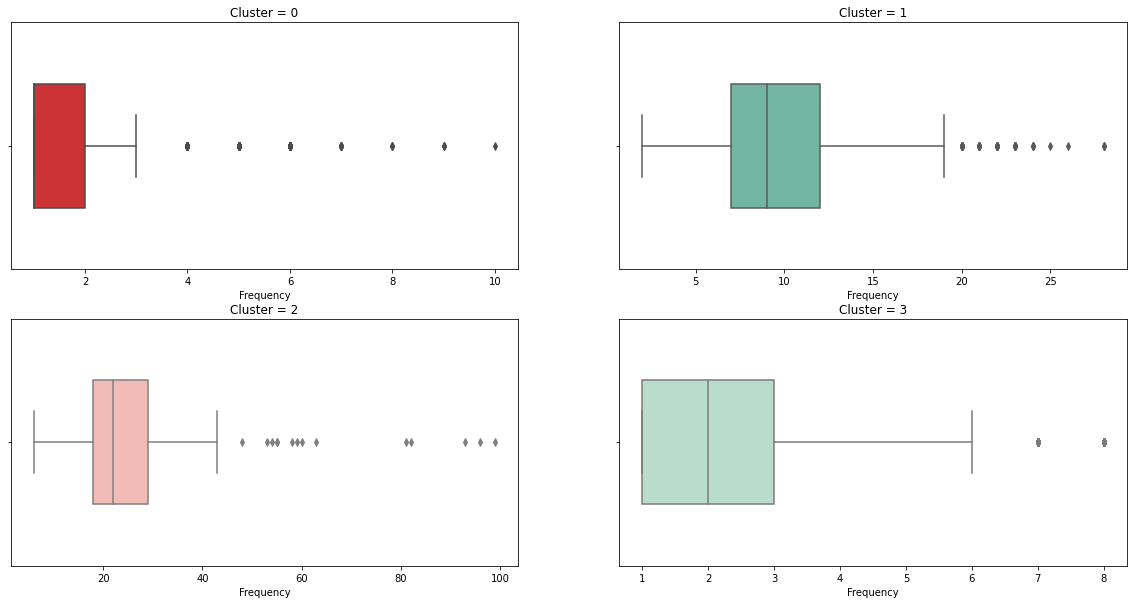

In [77]:
#Boxplots on Frequency by cluster
fig, ((ax1, ax2) , (ax3, ax4)) = plt.subplots(ncols = 2 ,nrows = 2,figsize = (20,10))
sns.boxplot(x=rfm_df[rfm_df['Cluster']==0]["Frequency"], ax = ax1, palette="Set1", width=0.5).set_title("Cluster = 0")
sns.boxplot(x=rfm_df[rfm_df['Cluster']==1]["Frequency"], ax = ax2, palette="Set2", width=0.5).set_title("Cluster = 1")
sns.boxplot(x=rfm_df[rfm_df['Cluster']==2]["Frequency"], ax = ax3, palette="Pastel1", width=0.5).set_title("Cluster = 2")
sns.boxplot(x=rfm_df[rfm_df['Cluster']==3]["Frequency"], ax = ax4, palette="Pastel2", width=0.5).set_title("Cluster = 3");

* Cluster 0 and 3 have the low-frequency rate, which means that consumers in these clusters buy infrequently.
* Cluster 2 has the highest purchase frequency

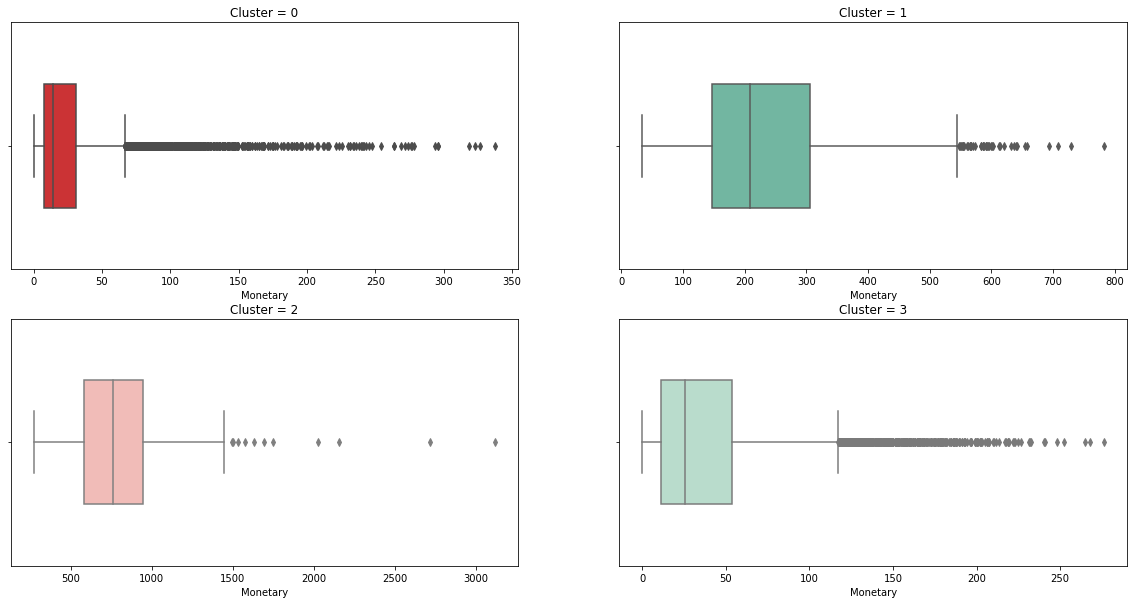

In [78]:
#Boxplots on Monetary by cluster
fig, ((ax1, ax2) , (ax3, ax4)) = plt.subplots(ncols = 2 ,nrows = 2,figsize = (20,10))
sns.boxplot(x=rfm_df[rfm_df['Cluster']==0]["Monetary"], ax = ax1, palette="Set1", width=0.5).set_title("Cluster = 0")
sns.boxplot(x=rfm_df[rfm_df['Cluster']==1]["Monetary"], ax = ax2, palette="Set2", width=0.5).set_title("Cluster = 1")
sns.boxplot(x=rfm_df[rfm_df['Cluster']==2]["Monetary"], ax = ax3, palette="Pastel1", width=0.5).set_title("Cluster = 2")
sns.boxplot(x=rfm_df[rfm_df['Cluster']==3]["Monetary"], ax = ax4, palette="Pastel2", width=0.5).set_title("Cluster = 3");

* Cluster 1 and 2 have the high monetary rate
* The difference between the smallest value and the maximum value of clusters 0 and 3 is quite large.

In [79]:
rfm_df[['Cluster', 'Recency','Frequency','Monetary']].groupby('Cluster').agg(['mean','max','min','count'])

Recency                   Frequency                   Monetary  \
               mean  max  min  count       mean max min  count        mean   
Cluster                                                                      
0        263.929875  365  164   8984   1.435997  10   1   8984   25.871316   
1         43.027537  318    1   1961   9.699133  28   2   1961  237.158960   
2         16.385214  120    1    257  25.163424  99   6    257  811.347393   
3         72.129373  184    1  11262   2.259901   8   1  11262   38.396684   

                                 
             max     min  count  
Cluster                          
0         337.48    0.16   8984  
1         782.35   34.20   1961  
2        3118.15  272.45    257  
3         276.01    0.14  11262

>**Customer Segmentation Using K Means Clustering**
*  **Cluster 0 (Casual Customers):** It accounts for a large proportion of total customers (40%) but has a low average spend and turnover rate, infrequent purchases (lowest frequency) as well as a low retention tendency (highest recency).
*  **Cluster 1 (Potential Loyalists):** Only accounts for about 8.73% of the total number of customers, but has the highest percentage of revenue and relatively high average spending, buys often but tends to maintain quite low (fair recency). Especially the recency of this customer group increased from 58 to 318 in the last quartile (75% to 100%).
*  **Cluster 2 (Loyal Customers):** All indicators of this customer group are significantly greater than the overall average. Largest average spend with lowest customer rate (1.14%), frequent purchase (highest frequency) and high retention trend (minimum recency).
*  **Cluster 3 (General Customers):** Accounting for the largest number of total customers (50.13%), the percentage of revenue that this customer group brings is high but the average spending is quite low, purchasing infrequently and tending to be quite low (recency in quite high).

###**Customer segmentation analysis**

####**Cluster 0: Casual Customers**

In [80]:
rfm_cluster0 = rfm_df[rfm_zscore['Cluster'] == 0]

In [81]:
rfm_cluster0.describe()

,Recency,Frequency,Monetary,Cluster
count,8984.000000,8984.000000,8984.000000,8984.0
mean,263.929875,1.435997,25.871316,0.0
std,55.375903,0.879162,32.095711,0.0
min,164.000000,1.000000,0.160000,0.0
25%,217.000000,1.000000,7.380000,0.0
50%,263.000000,1.000000,14.525000,0.0
75%,311.000000,2.000000,31.180000,0.0
max,365.000000,10.000000,337.480000,0.0


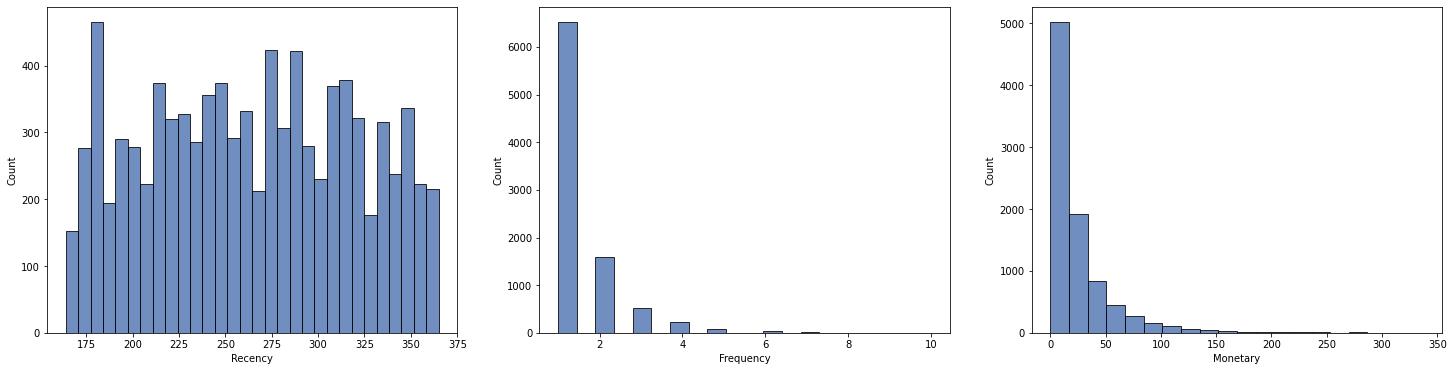

In [82]:
#Histogram of Recency, Frequency and Monetary of cluster 0
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (25,6))

ax1.hist(rfm_cluster0["Recency"], bins=30, alpha=0.8, color="#4c72b0", edgecolor='black')
#ax1.plot(rfm_zscore["Cluster"]==0]["Frequency"])

ax1.set_xlabel("Recency")
ax1.set_ylabel("Count")

ax2.hist(rfm_cluster0["Frequency"], bins=20, alpha=0.8, color="#4c72b0", edgecolor='black')

ax2.set_xlabel("Frequency")
ax2.set_ylabel("Count")

ax3.hist(rfm_cluster0["Monetary"], bins=20, alpha=0.8, color="#4c72b0", edgecolor='black')

ax3.set_xlabel("Monetary")
ax3.set_ylabel("Count")
plt.show()

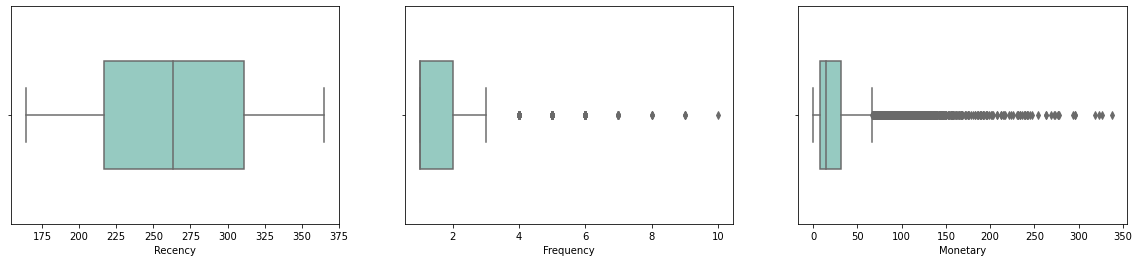

In [83]:
#Boxplots on Recency, Frequency and Monetary of cluster 0
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3
                                      ,nrows = 1
                                      ,figsize = (20,4))
sns.boxplot(x=rfm_df[rfm_df['Cluster']==0]["Recency"], ax = ax1, palette="Set3", width=0.5)
sns.boxplot(x=rfm_df[rfm_df['Cluster']==0]["Frequency"], ax = ax2, palette="Set3", width=0.5)
sns.boxplot(x=rfm_df[rfm_df['Cluster']==0]["Monetary"], ax = ax3, palette="Set3", width=0.5)

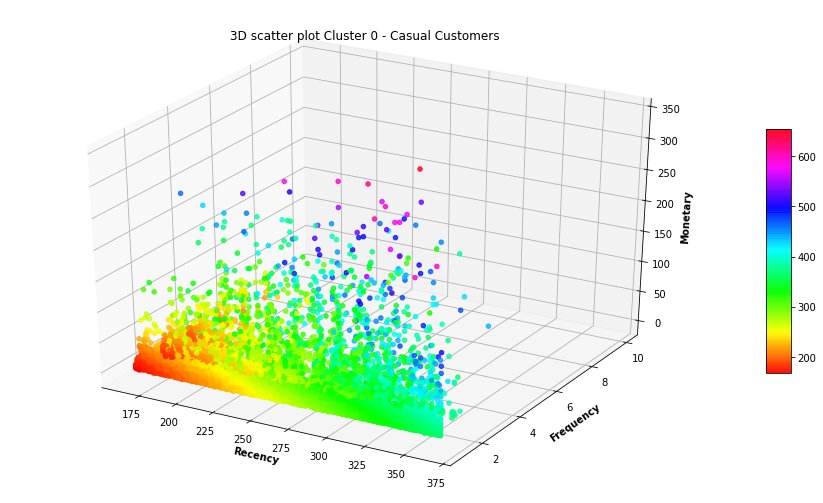

In [84]:
#3D Scatter of Cluster 0
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
x = rfm_cluster0['Recency']
y = rfm_cluster0['Frequency']
z = rfm_cluster0['Monetary']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap)
 
plt.title("3D scatter plot Cluster 0 - Casual Customers")
ax.set_xlabel('Recency', fontweight ='bold')
ax.set_ylabel('Frequency', fontweight ='bold')
ax.set_zlabel('Monetary', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 10)
 
# show plot
plt.show()

**COMMENT**

*   The group of casual customers accounts for a large proportion of the total number of customers (40%).

*   Very low retention tendency, highest recency value with an average of 264 non-purchase days (approximately 8.8 months). **The number of customers who have not purchased again after more than 300 days accounted for more than 25% of the total number of customers in the cluster with the largest number of days being 365 days.**

*   Having the lowest purchase frequency, the cluster's average purchase frequency is about 1.44%. **Up to 75% of customers in this group make purchases with a maximum frequency of 2 times/year and the maximum frequency of purchases in the cluster is 10 times/year**

*   Low level of spending, accounting for only about 17.37% of total revenue, **nearly 75% of cluster customers spend less than 30 per year.**

**INSIGHT**

*  These customers represent certain loss risks and need to be further observed.
*   This group of customers can bring a lot of risk to the business when accounting for a large number of customers, but the contribution value that this group brings is not high.
*  Marketing activities can be done such as notifying them about hot promotions such as holiday and discount sales or sending SMS to remind them of gift packages for returning customers.

#### **Cluster 1: Potential Loyalists**

In [85]:
rfm_cluster1 = rfm_df[rfm_zscore['Cluster'] == 1]
rfm_cluster1.describe()

,Recency,Frequency,Monetary,Cluster
count,1961.000000,1961.000000,1961.000000,1961.0
mean,43.027537,9.699133,237.158960,1.0
std,47.379603,4.021402,119.132174,0.0
min,1.000000,2.000000,34.200000,1.0
25%,13.000000,7.000000,146.700000,1.0
50%,27.000000,9.000000,208.780000,1.0
75%,58.000000,12.000000,306.660000,1.0
max,318.000000,28.000000,782.350000,1.0


In [86]:
rfm_cluster1

,Recency,Frequency,Monetary,Cluster
Customer_ID,,,,
44,30,7,152.76,1
109,273,6,361.87,1
165,61,7,350.24,1
210,91,4,284.15,1
217,123,6,263.49,1
...,...,...,...,...
22213,17,13,447.01,1
22231,2,7,153.90,1
22313,10,5,167.56,1


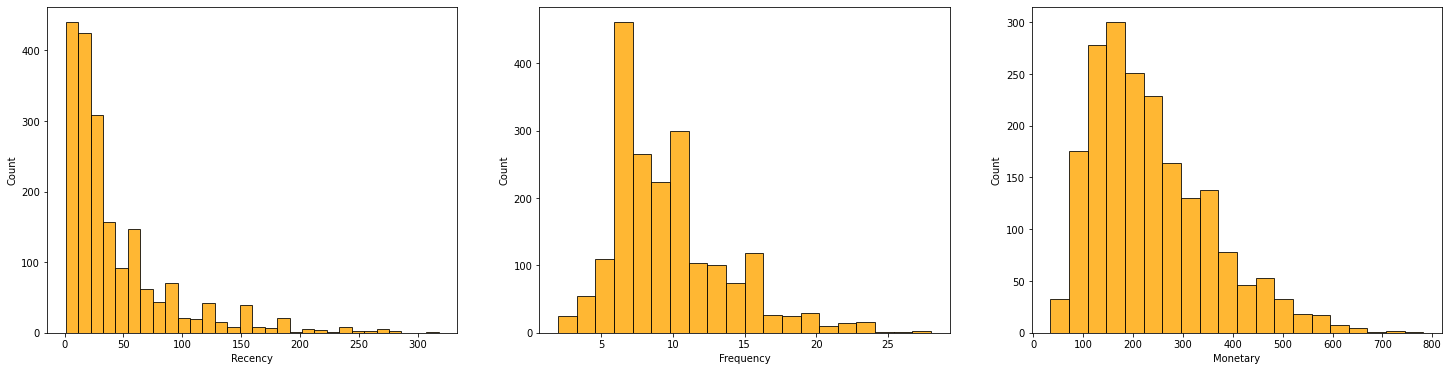

In [87]:
#Histogram of Recency, Frequency and Monetary of cluster 1
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (25,6))

ax1.hist(rfm_cluster1["Recency"], bins=30, alpha=0.8, color="Orange", edgecolor='black')

ax1.set_xlabel("Recency")
ax1.set_ylabel("Count")

ax2.hist(rfm_cluster1["Frequency"], bins=20, alpha=0.8, color="Orange", edgecolor='black')

ax2.set_xlabel("Frequency")
ax2.set_ylabel("Count")

ax3.hist(rfm_cluster1["Monetary"], bins=20, alpha=0.8, color="Orange", edgecolor='black')

ax3.set_xlabel("Monetary")
ax3.set_ylabel("Count")
plt.show()

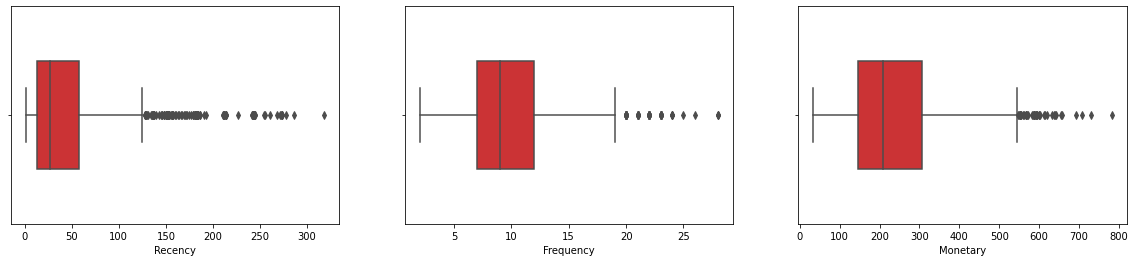

In [88]:
#Boxplots of Recency and Frequency of cluster 1
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3
                                      ,nrows = 1
                                      ,figsize = (20,4))
sns.boxplot(x=rfm_df[rfm_df['Cluster']==1]["Recency"], ax = ax1, palette="Set1", width=0.5)
sns.boxplot(x=rfm_df[rfm_df['Cluster']==1]["Frequency"], ax = ax2, palette="Set1", width=0.5)
sns.boxplot(x=rfm_df[rfm_df['Cluster']==1]["Monetary"], ax = ax3, palette="Set1", width=0.5)

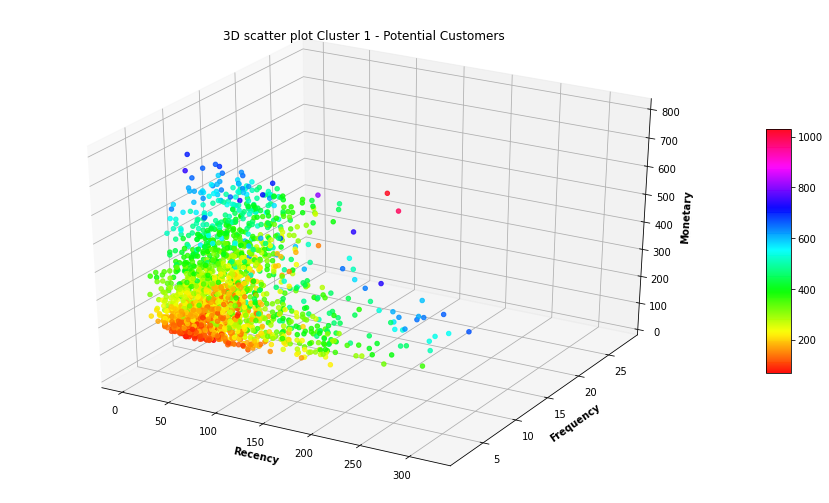

In [89]:
#3D Scatter of Cluster 1
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
x = rfm_cluster1['Recency']
y = rfm_cluster1['Frequency']
z = rfm_cluster1['Monetary']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap)
 
plt.title("3D scatter plot Cluster 1 - Potential Customers")
ax.set_xlabel('Recency', fontweight ='bold')
ax.set_ylabel('Frequency', fontweight ='bold')
ax.set_zlabel('Monetary', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 10)
 
# show plot
plt.show()

**COMMENT**


*   Percentage of potential loyalists is 8.73% of total customers
*   Although potential loyalists is a small group, they are the group that accounts for the highest revenue of total customers (34.75%)
*   When comparing this cluster with others, we can see that the average monetary, frequency and recency of  customers is good, but the rank is quite low, just higher than cluster 0 (casual customer).
*  This shows that high spenders do not buy often, frequent shoppers are not good spending or new customers with good recency but low frequency. **They often in the group of customers with low brand loyalty or new customers.**
*  In the last quartile, recency of this cluster increase from 58 to 318 (25% customers of this cluster - 25% low loyalty customers).
*  Frequency of this cluster is not good, only form 2 to 28 (new customers or old customers rarely buy) 
*  Monetary of this cluster is not very high just form 34.2 to 782.35 but total spending of cluster 1 is the highest.

**INSIGHT**

*  Customers in cluster 1 almost are new customers with good spending. On the other hand, there is also a great number of low loyalty customers, their recency are bad (a very long time with no purchasing)
*  We should have some suitable campaign for this cluster, raise demand of new customers to increase their frequency, remind for old customers by sms/email marketing to make them return.


#### **Cluster 2: Loyal Customers**

In [90]:
rfm_cluster2 = rfm_df[rfm_zscore['Cluster'] == 2]
rfm_cluster2.describe()

#Note: các chỉ số đều tốt

,Recency,Frequency,Monetary,Cluster
count,257.000000,257.000000,257.000000,257.0
mean,16.385214,25.163424,811.347393,2.0
std,16.848227,13.363771,356.592599,0.0
min,1.000000,6.000000,272.450000,2.0
25%,4.000000,18.000000,583.440000,2.0
50%,12.000000,22.000000,760.840000,2.0
75%,19.000000,29.000000,947.310000,2.0
max,120.000000,99.000000,3118.150000,2.0


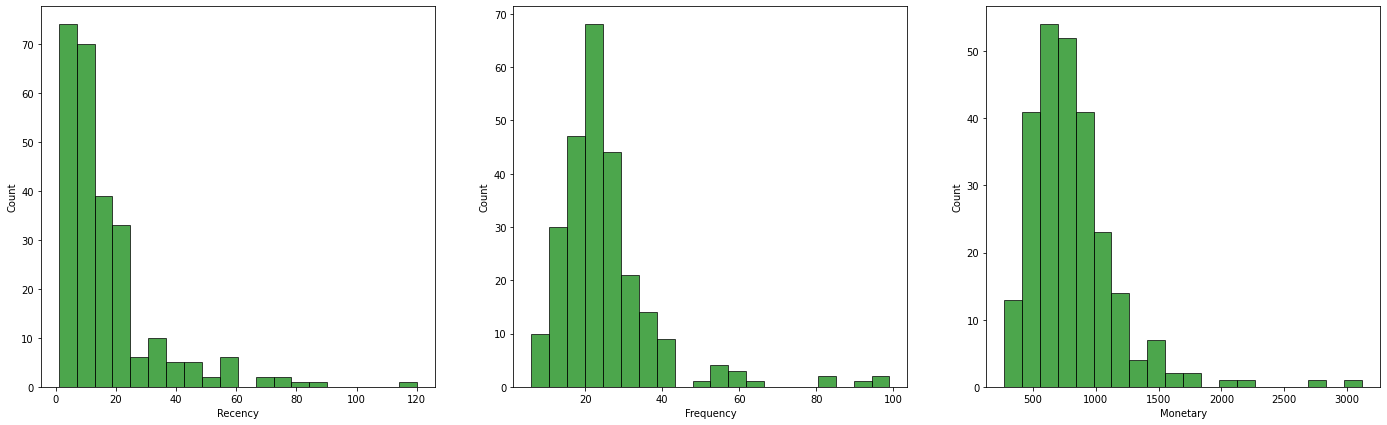

In [91]:
#Histogram of Recency, Frequency and Monetary of cluster 2
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (24,7))

ax1.hist(rfm_cluster2["Recency"], bins=20, alpha=0.7, color="Green", edgecolor='black')

ax1.set_xlabel("Recency")
ax1.set_ylabel("Count")

ax2.hist(rfm_cluster2["Frequency"], bins=20, alpha=0.7, color="Green", edgecolor='black')

ax2.set_xlabel("Frequency")
ax2.set_ylabel("Count")

ax3.hist(rfm_cluster2["Monetary"], bins=20, alpha=0.7, color="Green", edgecolor='black')

ax3.set_xlabel("Monetary")
ax3.set_ylabel("Count")
plt.show()

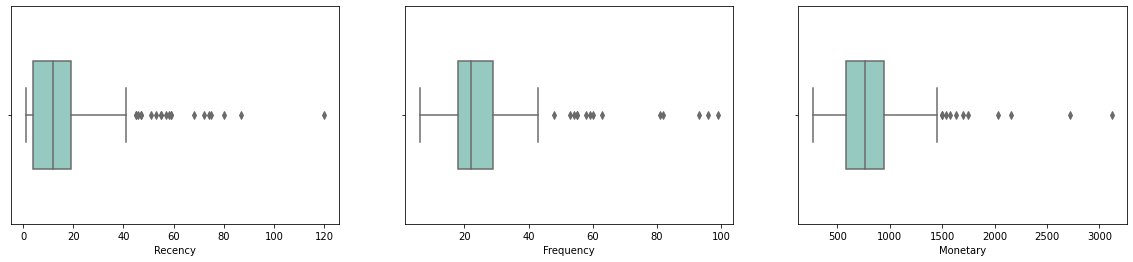

In [92]:
#Boxplots of Recency and Frequency of cluster 2
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3
                                      ,nrows = 1
                                      ,figsize = (20,4))
sns.boxplot(x=rfm_df[rfm_df['Cluster']==2]["Recency"], ax = ax1, palette="Set3", width=0.5)
sns.boxplot(x=rfm_df[rfm_df['Cluster']==2]["Frequency"], ax = ax2, palette="Set3", width=0.5)
sns.boxplot(x=rfm_df[rfm_df['Cluster']==2]["Monetary"], ax = ax3, palette="Set3", width=0.5)

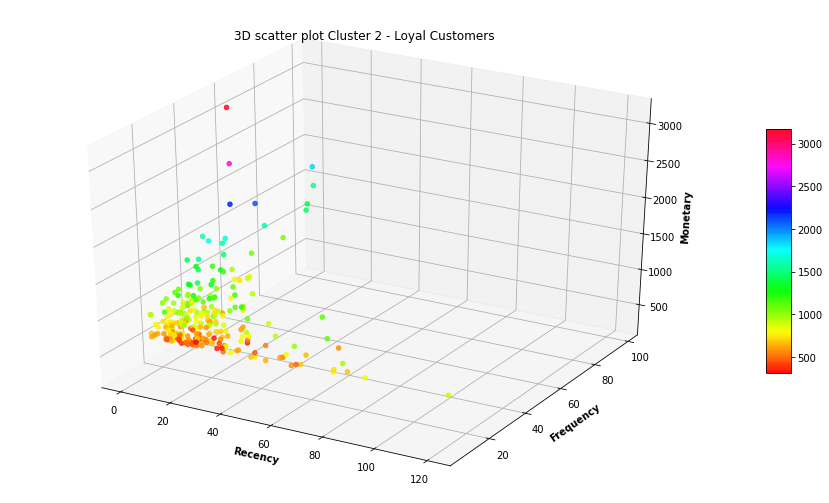

In [93]:
# Import libraries
from mpl_toolkits import mplot3d
# Creating dataset
x = rfm_cluster2['Recency']
y = rfm_cluster2['Frequency']
z = rfm_cluster2['Monetary']
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating color map
my_cmap = plt.get_cmap('hsv')
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap)
plt.title("3D scatter plot Cluster 2 - Loyal Customers")
ax.set_xlabel('Recency', fontweight ='bold')
ax.set_ylabel('Frequency', fontweight ='bold')
ax.set_zlabel('Monetary', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 10)
# show plot
plt.show()


**COMMENT**

* This customer segment has 257 customers, accounting for 1.14% of the total number of customers.
* The latest purchase date (Recency) is in the best group. The average of recency is 16 days.
* The average of frequency was 25 times much higher than the other three groups; 
* With the Monetary pretty hight the customer group may be willing to spend a lot of money on shopping.

* Although loyal customers is a smallest group, they are the group that accounts for the 15,58 percentage of total revenue.

**INSIGHT**

* Average recency of this cluster is low,  which means they still tend to come back for the next purchase.
*  We should have great deals and promotion for this cluster to keep their with our company. Moreover implement some Customer Appreciation Programs for them such as  offer loyalty rewards, present voucher in their birhtday, private support line.....


#### **Cluster 3: General Customers**

In [94]:
rfm_cluster3 = rfm_df[rfm_zscore['Cluster'] == 3]
rfm_cluster3.describe()

#Note: chiếm số lượng lớn nhất, các chỉ số khá ổn định

,Recency,Frequency,Monetary,Cluster
count,11262.000000,11262.000000,11262.000000,11262.0
mean,72.129373,2.259901,38.396684,3.0
std,46.843385,1.536469,37.239318,0.0
min,1.000000,1.000000,0.140000,3.0
25%,30.000000,1.000000,11.460000,3.0
50%,67.000000,2.000000,25.515000,3.0
75%,108.000000,3.000000,53.780000,3.0
max,184.000000,8.000000,276.010000,3.0


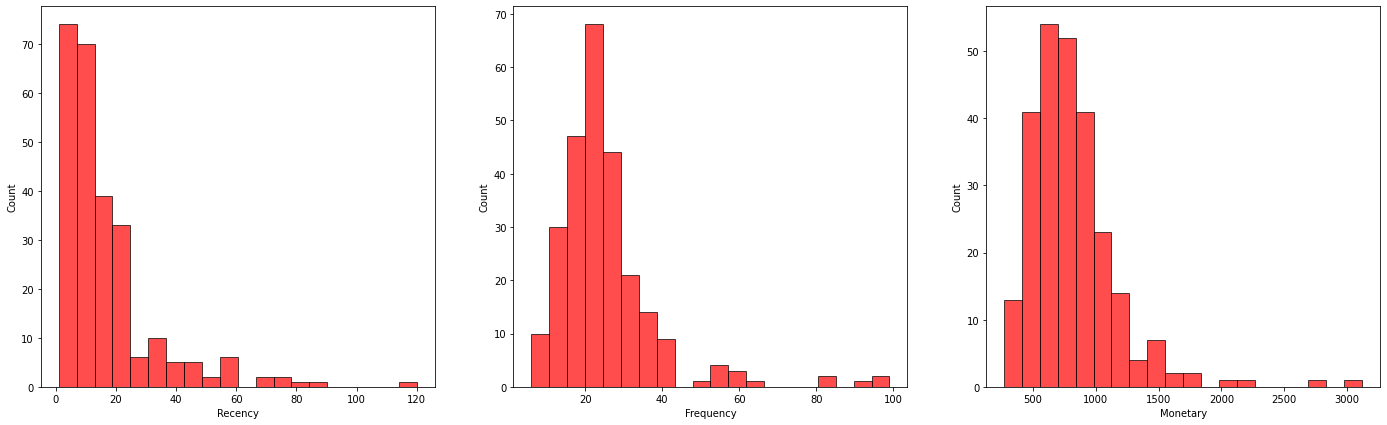

In [95]:
#Histogram of Recency, Frequency and Monetary of cluster 3
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (24,7))

ax1.hist(rfm_cluster2["Recency"], bins=20, alpha=0.7, color="Red", edgecolor='black')

ax1.set_xlabel("Recency")
ax1.set_ylabel("Count")

ax2.hist(rfm_cluster2["Frequency"], bins=20, alpha=0.7, color="Red", edgecolor='black')

ax2.set_xlabel("Frequency")
ax2.set_ylabel("Count")

ax3.hist(rfm_cluster2["Monetary"], bins=20, alpha=0.7, color="Red", edgecolor='black')

ax3.set_xlabel("Monetary")
ax3.set_ylabel("Count")
plt.show()


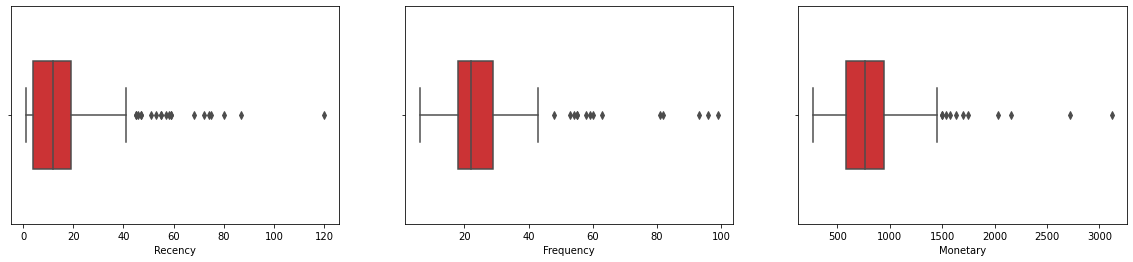

In [96]:
#Boxplots of Recency and Frequency of cluster 3
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3
                                      ,nrows = 1
                                      ,figsize = (20,4))
sns.boxplot(x=rfm_df[rfm_df['Cluster']==2]["Recency"], ax = ax1, palette="Set1", width=0.5)
sns.boxplot(x=rfm_df[rfm_df['Cluster']==2]["Frequency"], ax = ax2, palette="Set1", width=0.5)
sns.boxplot(x=rfm_df[rfm_df['Cluster']==2]["Monetary"], ax = ax3, palette="Set1", width=0.5)

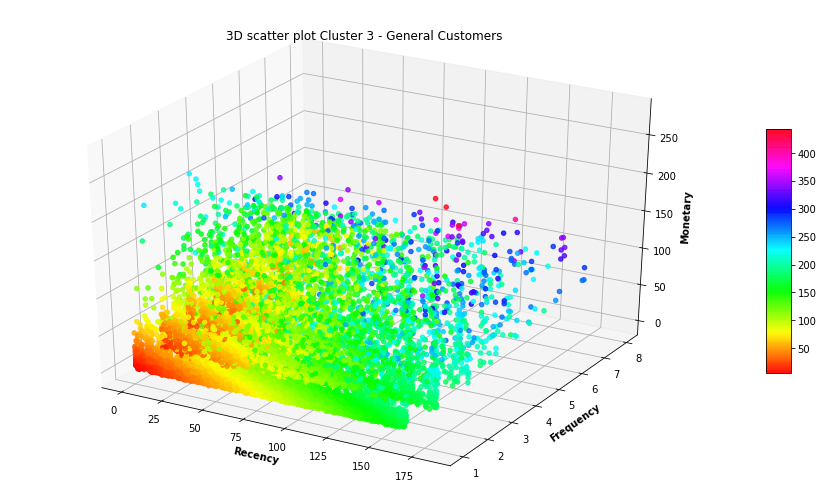

In [97]:
#3D Scatter of Cluster 3
# Import libraries
from mpl_toolkits import mplot3d
# Creating dataset
x = rfm_cluster3['Recency']
y = rfm_cluster3['Frequency']
z = rfm_cluster3['Monetary']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap)
 
plt.title("3D scatter plot Cluster 3 - General Customers")
ax.set_xlabel('Recency', fontweight ='bold')
ax.set_ylabel('Frequency', fontweight ='bold')
ax.set_zlabel('Monetary', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 10)
 
# show plot
plt.show()

**COMMENT** 
*  Percentage of general customers is 50.13% of total customers - the largest group
* The spending level (Monetary) is not too high and lower than the Potential customer group but accounted for quite high with 32.31% of total revenue
*  Recency and Frequency remained at a more stable level, 50% of this customer group made purchases about 2 times per year and 75% of customers bought 3 times a year
* When comparing this cluster with others, we can see that the average monetary is not good, just higher than Casual Customer
* The Recency factor in the general customer group, that is, the Recency increased from 67 to 108, Monetary increase double (25 to 53) when considering from 50% of the visitors of this group to 75%.


**INSIGHT**

* With this group of customers, we can continue to improve current sales policies to retain this customer group beside finding out potential customers in this group and promoting them to become loyal customers.
* We can send attractive deals to them and offer discounts and deals to trigger more purchases. Sending timely and personalized content to such groups can increase their value to our business. 


##**Experiment**

In [98]:
#Get rfm parameter of Customer_ID 2628 to check output
test_df_3 = segmentation_df.reset_index()
test_df_3[test_df_3['Customer_ID'] == 2628]

,Customer_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Level,Segment
2605,2628,268,2,13.62,1,3,2,132,6,Silver,At Risk


In [99]:
test_df_3 = rfm_df.reset_index()
test_df_3[test_df_3['Customer_ID'] == 2628]

,Customer_ID,Recency,Frequency,Monetary,Cluster
2605,2628,268,2,13.62,0


In [100]:
def ask_ip_values():
  recency = int(input("Recency: "))
  frequency = int(input("Frequency: "))
  monetary = float(input("Monetary: "))
  my_df = rfm_df.drop('Cluster', axis = 1)
  my_df_1 = pd.DataFrame(
    {
        'Recency': [recency], 
        'Frequency': [frequency], 
        'Monetary': [monetary]
    }
)
  my_df = pd.concat([my_df, my_df_1], ignore_index = True, axis = 0)
  return my_df

In [101]:
def segmentation_model_rfm(my_df):
  my_df['R_Score'] = my_df['Recency'].apply(RScore, args=('Recency',quantiles,))
  my_df['F_Score'] = my_df['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
  my_df['M_Score'] = my_df['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
  my_df['RFM_Segment'] = my_df['R_Score'].map(str) + my_df['F_Score'].map(str) + my_df['M_Score'].map(str)
  seg_map = {
     r'11': 'Lost',
     r'2[1-2]': 'Hibernating',
     r'[1–2][3–4]': 'At Risk',
     r'[1-2]5': 'Can\'t Lose',
     r'3[1–2]': 'About to Sleep',
     r'33': 'Need Attention',
     r'[3–4][4–5]': 'Loyal Customers',
     r'41': 'Promising',
     r'51': 'Recent Customers',
     r'[4–5][2–3]': 'Potential Loyalists',
     r'5[4–5]': 'Champions'}
  my_df['Segment'] = my_df['R_Score'].map(str) + my_df['F_Score'].map(str)
  my_df['Segment'] = my_df['Segment'].replace(seg_map, regex=True)
  return my_df

In [102]:
def segmentation_model_kmeans(my_df):
  segments = kmean_model.predict(my_df.apply(zscore))
  my_df['Cluster'] = segments
  seg = segments[-1]
  return seg

In [103]:
def segmentation_model():
  my_df = ask_ip_values()
  my_df_rfm = my_df.copy()
  segmentation_model_rfm(my_df_rfm)
  print('1. Segment by RFM')
  print(f'- RFM_Segment: {my_df_rfm["RFM_Segment"].iloc[-1]}')
  print(f'- Labeling Segmentation: {my_df_rfm["Segment"].iloc[-1]}')
  seg = segmentation_model_kmeans(my_df)
  print('2. Segment by KMeans')
  if (seg == 0):
    return print(f'Casual Customers (Cluster: {seg})')
  elif (seg == 1):
    return print(f'Potential Customers (Cluster: {seg})')
  elif (seg == 2):
    return print(f'Loyal Customers (Cluster: {seg})')
  elif (seg == 3):
    return print(f'General Customers (Cluster: {seg})')

In [104]:
#Enter the same rfm as customer id 2628 to check the output
segmentation_model()

Recency: 268
Frequency: 2
Monetary: 13.62
1. Segment by RFM
- RFM_Segment: 132
- Labeling Segmentation: At Risk
2. Segment by KMeans
Casual Customers (Cluster: 0)


In [105]:
segmentation_model()

Recency: 11
Frequency: 4
Monetary: 68.24
1. Segment by RFM
- RFM_Segment: 544
- Labeling Segmentation: Champions
2. Segment by KMeans
General Customers (Cluster: 3)
